# Introduction
The objective of this notebook is to give an overview of integrating Jupyter Notebooks with R, Python, and arcpy. This notebook opens to the repository from Github (https://github.com/tyler-mahoney/modeling-streamflow-permanence). So if someone were to clone the respository, this code should work, as long as the proper inputs are present.

# Notebook Setup
Both ArcPro 3.0.0 and Anaconda 4.13.0 are required to install the arcpy library to Jupyter and setup the kernels needed to run the code. To check if ArcPro is properly installed to the Desktop, navigate to ```C:\Program Files\ArcGIS\Pro\bin\Python\envs``` and check that the ```arcgispro-py3``` evnironment is installed. I installed Anaconda to my user profile, so all Anaconda environments that I create are stored at ```C:\Users\<user name>\anaconda3\envs```. 

The steps to enable arcpy and the required kernels to run the notebook are detailed below.

### Enabling arcpy and the Python kernel  
First, ensure that the correct versions of ArcPro and Anaconda are installed on the desktop. From the start menu (if running on windows) open Anaconda Prompt (```C:\Users\<user name>\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Anaconda3 (64-bit)\Anaconda Prompt (anaconda3)```) and enter the following lines of code:
>```conda create -n esri```  
>```conda activate esri```  
>```conda install -c esri arcpy```  
>```python -m ipykernel install --user --name esri --display-name "Python (esri)"```

These lines of code do the following: 1) create a new environment (named ```esri```) for ```Python``` within the Anaconda environment (located at: ```C:\Users\<user name>\anaconda3\envs```); 2) activate the ```esri``` environment; 3) install the ```arcpy``` module to the ```esri``` environment; and 4) create a new ```Python``` kernel that should be used within the environment.

### Enabling the R kernel  
To run the chunks of code written in ```R```, it will be necessary to install ```R``` to the ```esri``` environment. While the ```esri``` enviroment is still active write the following code in Anaconda prompt: 
>```conda install -c r r-irkernel```

### Starting Jupyter Notebook  
It is necessary to run this notebook *via* the Anaconda prompt *after* activating the ```esri``` environment. Upon opening Anaconda Prompt for the first time, one should see the following:
>```(base) C:\Users\<user name>```

Here, ```(base)``` indicates the active environment, and ```C:\Users\<user name>``` is the active directory. Note, if you'd like to change the directory, this can simply be done by inputting ```cd c:\users\...``` to Anaconda Prompt depending on the directory you would like to navigate to. To activate the ```esri``` environment, type into Anaconda Prompt: 
>```conda activate esri```

Next, what you should see is a new line and the environment should be updated as: 
>```(esri) C:\Users\<user name>```

Finally, open the jupyter notebook by typing into Anaconda Prompt (again noting that the active environment must be ```esri```):
>```jupyter notebook```

It is then possible to open this notebook from wherever the ```modeling-streamflow-permanence``` directory is cloned to. 

*Note: it is only necessary to create the esri environment and enable the python and R kernels once. However, the Jupyter Notebook must be opened from Anaconda Prompt after activating the esri environment **every** time the notebook is to be run*

# Testing the R Kernel
In the Jupyter toolbar above, navigate to ```kernel > change kernel``` and choose ```R```. 

When the ```R``` kernel is active, the ```R``` logo will appear next to ```Logout```. 

The following code should now properly run:

[1] "C:/Users/david/OneDrive/Desktop/EPA/EPA/6 PROJECT 1 KENTUCKY HEADWATER STREAMS/4 ANALYSIS/5 STREAMFLOW PERMANENCE MODEL/modeling-streamflow-permanence"

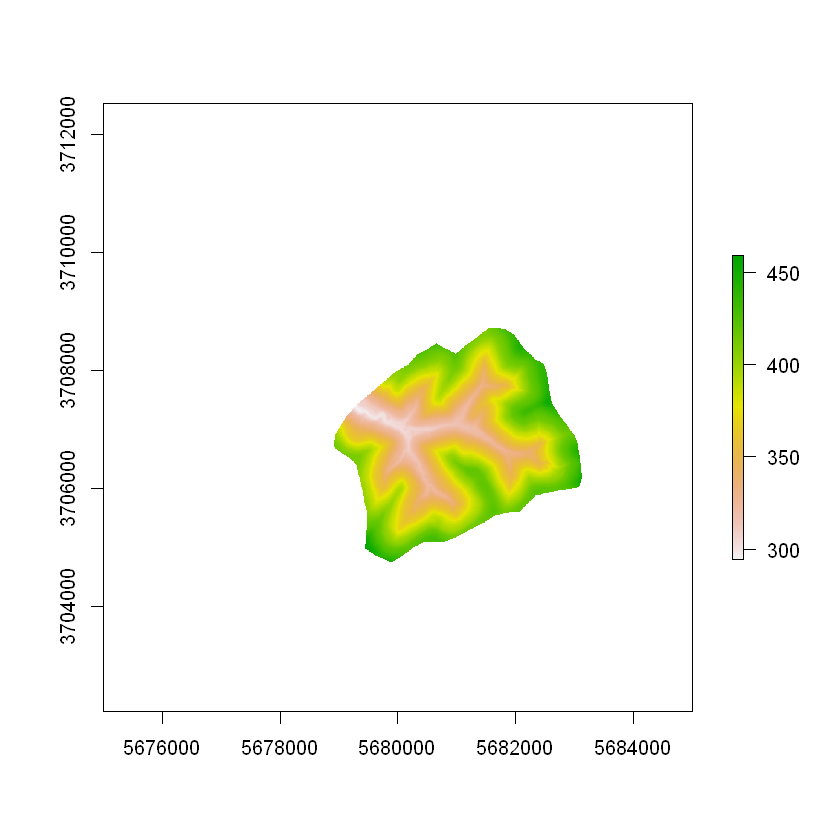

In [1]:
library(sp)                                             # Install library sp
library(raster)                                         # Install library raster

getwd()                                                 # Return the working directory - should be modeling-streamflow-permanence 

dem <- raster('SpatialInputData/fr1meterDEM.tif')       # Load in the Falling Rock DEM
plot(dem)                                               # Plot the Falling Rock DEM

## Testing the Python Kernel
In the Jupyter toolbar above, navigate to ```kernel > change kernel``` and choose ```Python (esri)```.

When the ```Python (esri)``` kernel is active, the ```Python``` logo will appear next to ```Logout```.

The following code should now properly run:

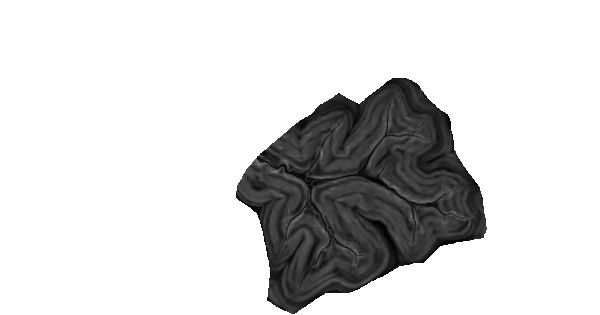

In [1]:
import arcpy                                                    # Import arcpy, arcgis, numpy, matplotlib, and other necessary modules and libraries
import arcgis
import numpy
import matplotlib.pyplot as plt
from IPython.display import display
from arcgis.gis import GIS
from arcpy import env
from arcpy.sa import *
from arcgis.raster import Raster

env.workspace = 'SpatialInputData/'                             # Define the environemnt where the inputs are located
DEM_FR = Raster('SpatialInputData/fr1meterDEM.tif')             # load in the raster
slope_FR = Slope('fr1meterDEM.tif','PERCENT_RISE')              # Run the slope tool from sa 
#slope_FR.save("C:/Users/david/arcgis-python-api-0.3-beta/Slope_FR.tif") # save the slope tool to a local folder

gis = GIS()                                                     # Load in the gis object

display(slope_FR)                                               # Display the slope data 


In [3]:
map2 = gis.map()
slope_FR_raster = Raster("C:/Users/david/arcgis-python-api-0.3-beta/Slope_FR.tif")
map2.add_layer(slope_FR_raster)
map2.zoom_to_layer(slope_FR_raster)
map2

MapView(layout=Layout(height='400px', width='100%'))

In [55]:
map2.remove_layers([slope_FR_raster,])

True